In [1]:
from pathlib import Path

root = Path("/home/slwp1/work/testing123/susan/test-video-pairs") # where the video pairs are
files = sorted([p for p in root.glob("*.mp4")])
print("Found", len(files), "mp4 files")
for f in files:
    print(f.name)

Found 6 mp4 files
02_Co-Ngan_400-700_13-14-15_0112___left_device23_signer02_left_ord1_604.mp4
02_Co-Ngan_400-700_13-14-15_0112___right_device24_signer02_right_ord1_604.mp4
04_Co-Hang_400-607_13-14-15_0122___left_device31_1_signer04_left_ord1_496.mp4
04_Co-Hang_400-607_13-14-15_0122___right_device19_1_signer04_right_ord1_496.mp4
06_Co-Son_400-700_7-8-9_0118___center_device31_signer06_center_ord1_564.mp4
06_Co-Son_400-700_7-8-9_0118___right_device19_signer06_right_ord1_564.mp4


In [3]:
# group the videos into pairs 
import re
from collections import defaultdict

def view_of(name):
    m = re.search(r"___(left|center|right)_", name)
    return m.group(1) if m else None

def ord_key(name):
    m = re.search(r"(ord\d+_\d+)\.mp4$", name)
    return m.group(1) if m else None

groups = defaultdict(list)
for f in files:
    k = ord_key(f.name)
    groups[k].append(f)

pairs = {}
for k, lst in groups.items():
    if len(lst) == 2:
        pairs[k] = sorted(lst, key=lambda x: view_of(x.name) or "")
print("Pairs found:", len(pairs))
for k, lst in pairs.items():
    print(k, "->", [p.name for p in lst])

Pairs found: 3
ord1_604 -> ['02_Co-Ngan_400-700_13-14-15_0112___left_device23_signer02_left_ord1_604.mp4', '02_Co-Ngan_400-700_13-14-15_0112___right_device24_signer02_right_ord1_604.mp4']
ord1_496 -> ['04_Co-Hang_400-607_13-14-15_0122___left_device31_1_signer04_left_ord1_496.mp4', '04_Co-Hang_400-607_13-14-15_0122___right_device19_1_signer04_right_ord1_496.mp4']
ord1_564 -> ['06_Co-Son_400-700_7-8-9_0118___center_device31_signer06_center_ord1_564.mp4', '06_Co-Son_400-700_7-8-9_0118___right_device19_signer06_right_ord1_564.mp4']


In [4]:
# check fps, frame count and resolution
import cv2

def video_info(path):
    cap = cv2.VideoCapture(str(path))
    if not cap.isOpened():
        return None
    fps = cap.get(cv2.CAP_PROP_FPS)
    n   = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    w   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return fps, n, (w,h)

for k, (a,b) in pairs.items():
    ia = video_info(a); ib = video_info(b)
    print("\n", k)
    print(" A:", a.name, ia)
    print(" B:", b.name, ib)


 ord1_604
 A: 02_Co-Ngan_400-700_13-14-15_0112___left_device23_signer02_left_ord1_604.mp4 (30.0, 78, (514, 720))
 B: 02_Co-Ngan_400-700_13-14-15_0112___right_device24_signer02_right_ord1_604.mp4 (29.97, 78, (1086, 980))

 ord1_496
 A: 04_Co-Hang_400-607_13-14-15_0122___left_device31_1_signer04_left_ord1_496.mp4 (59.94, 240, (716, 1080))
 B: 04_Co-Hang_400-607_13-14-15_0122___right_device19_1_signer04_right_ord1_496.mp4 (29.97, 120, (1058, 1076))

 ord1_564
 A: 06_Co-Son_400-700_7-8-9_0118___center_device31_signer06_center_ord1_564.mp4 (29.97, 113, (852, 920))
 B: 06_Co-Son_400-700_7-8-9_0118___right_device19_signer06_right_ord1_564.mp4 (29.97, 113, (974, 1080))


# Pair-by-pair diagnosis
## Pair1 - ord1_604 left/right
- A: 30.0 fps, 78 frames
- B: 29.97 fps, 78 frames
**very similar structure - good to use**
## Pair2 - ord1_496 left/right
- A: 59.94 fps, 240 frames
- B: 29.97 fps, 120 frames
**right = 2x left**
## Pair3 - ord1_564 center/right
- A: 29.97 fps, 113 frames
- B: 29.97 fps, 113 frames
**camera angle difference may result in flat output**

In [5]:
# use only pair1 for now
from pathlib import Path
import cv2

root = Path("/home/slwp1/work/testing123/susan/test-video-pairs")

left_path  = root / "02_Co-Ngan_400-700_13-14-15_0112___left_device23_signer02_left_ord1_604.mp4"
right_path = root / "02_Co-Ngan_400-700_13-14-15_0112___right_device24_signer02_right_ord1_604.mp4"

def video_info(path):
    cap = cv2.VideoCapture(str(path))
    assert cap.isOpened(), f"Cannot open {path}"
    fps = cap.get(cv2.CAP_PROP_FPS)
    n   = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
    w   = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    h   = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    cap.release()
    return fps, n, (w,h)

print("LEFT :", left_path.name,  video_info(left_path))
print("RIGHT:", right_path.name, video_info(right_path))

LEFT : 02_Co-Ngan_400-700_13-14-15_0112___left_device23_signer02_left_ord1_604.mp4 (30.0, 78, (514, 720))
RIGHT: 02_Co-Ngan_400-700_13-14-15_0112___right_device24_signer02_right_ord1_604.mp4 (29.97, 78, (1086, 980))


In [33]:
# read the same time frame index from both videos
import numpy as np

def read_frame(path, idx):
    cap = cv2.VideoCapture(str(path))
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ok, frame = cap.read()
    cap.release()
    if not ok:
        raise RuntimeError(f"Failed to read frame {idx} from {path.name}")
    return frame

idx = 39 # change the idx
imgL = read_frame(left_path, idx)
imgR = read_frame(right_path, idx)

print("Frame shapes:", imgL.shape, imgR.shape)

Frame shapes: (720, 514, 3) (980, 1086, 3)


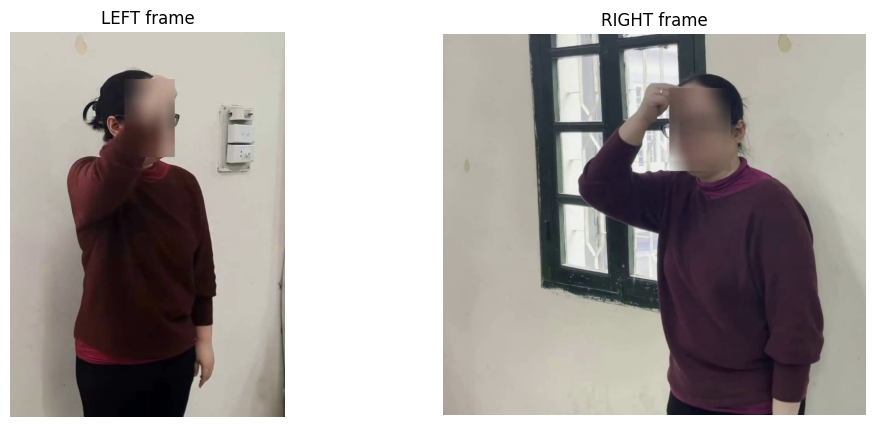

In [35]:
# visualize 
import matplotlib.pyplot as plt

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(imgL[:,:,::-1]); plt.axis("off"); plt.title("LEFT frame")
plt.subplot(1,2,2); plt.imshow(imgR[:,:,::-1]); plt.axis("off"); plt.title("RIGHT frame")
plt.show()

In [31]:
# ORB feature detection + matching 
# scan through all 78 and pick the one with the most good matches
import cv2
import numpy as np

def read_frame(path, idx):
    cap = cv2.VideoCapture(str(path))
    cap.set(cv2.CAP_PROP_POS_FRAMES, idx)
    ok, frame = cap.read()
    cap.release()
    return frame if ok else None

def orb_good_match_count(img1, img2, max_features=4000, ratio=0.8):
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    orb = cv2.ORB_create(nfeatures=max_features)
    kp1, des1 = orb.detectAndCompute(gray1, None)
    kp2, des2 = orb.detectAndCompute(gray2, None)

    if des1 is None or des2 is None:
        return 0, None, None, None, None

    bf = cv2.BFMatcher(cv2.NORM_HAMMING)
    knn = bf.knnMatch(des1, des2, k=2)

    good = []
    pts1, pts2 = [], []
    for m, n in knn:
        if m.distance < ratio * n.distance:
            good.append(m)
            pts1.append(kp1[m.queryIdx].pt)
            pts2.append(kp2[m.trainIdx].pt)

    pts1 = np.array(pts1, dtype=np.float32)
    pts2 = np.array(pts2, dtype=np.float32)
    return len(good), kp1, kp2, good, (pts1, pts2)

def find_best_frame_by_matches(left_path, right_path, max_features=4000, ratio=0.8):
    capL = cv2.VideoCapture(str(left_path))
    capR = cv2.VideoCapture(str(right_path))
    assert capL.isOpened() and capR.isOpened()

    nL = int(capL.get(cv2.CAP_PROP_FRAME_COUNT))
    nR = int(capR.get(cv2.CAP_PROP_FRAME_COUNT))
    n = min(nL, nR)

    best = {"idx": None, "good": -1, "kp1": None, "kp2": None, "matches": None, "pts": None}
    for idx in range(n):
        capL.set(cv2.CAP_PROP_POS_FRAMES, idx)
        capR.set(cv2.CAP_PROP_POS_FRAMES, idx)
        ok1, img1 = capL.read()
        ok2, img2 = capR.read()
        if not ok1 or not ok2:
            continue

        good_count, kp1, kp2, matches, pts = orb_good_match_count(img1, img2, max_features=max_features, ratio=ratio)
        if good_count > best["good"]:
            best.update({"idx": idx, "good": good_count, "kp1": kp1, "kp2": kp2, "matches": matches, "pts": pts})

    capL.release()
    capR.release()
    return best

best = find_best_frame_by_matches(left_path, right_path, ratio=0.8)
print("Best frame idx:", best["idx"])
print("Best good matches:", best["good"])

Best frame idx: 19
Best good matches: 29


Using frame: 19
Frame shapes: (720, 514, 3) (980, 1086, 3)


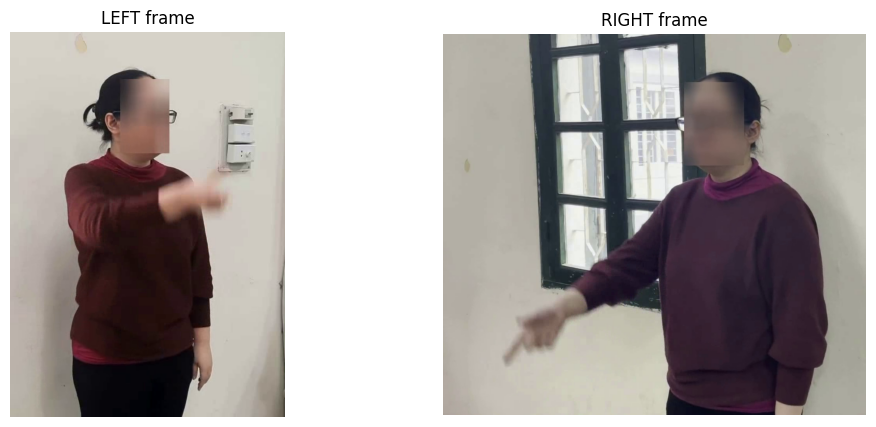

Keypoints L/R: 1064 1721
Good matches: 29


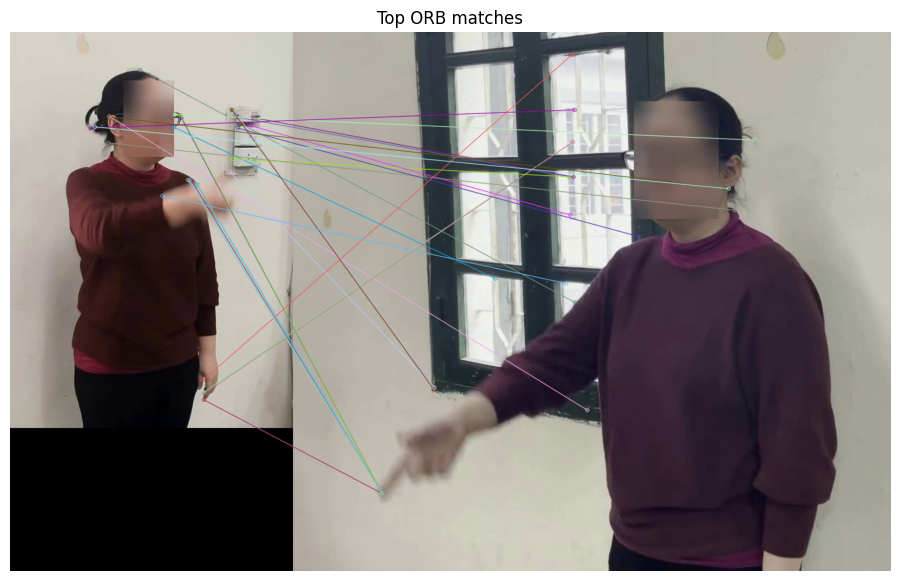

F inliers: 11 / 29
F:
 [[ 2.62463432e-06  3.32127956e-06 -1.69601427e-03]
 [ 1.19990738e-06  1.87452216e-06 -8.68015848e-04]
 [-1.45631646e-03 -2.06942889e-03  1.00000000e+00]]


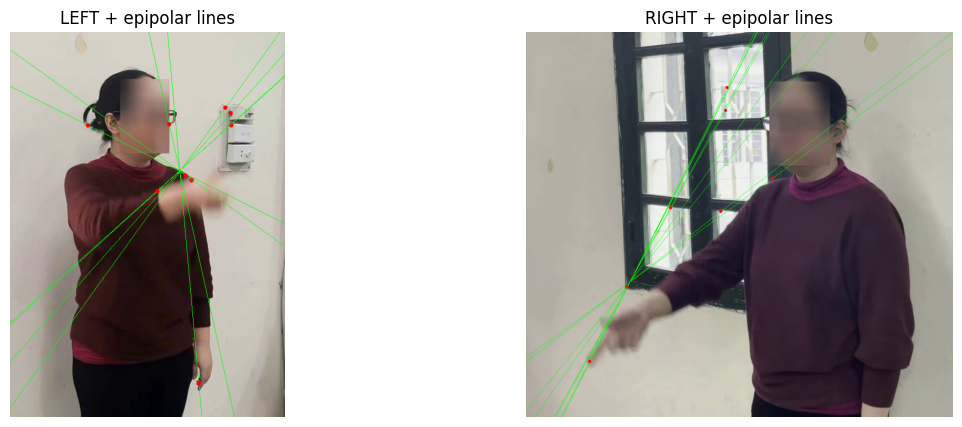

Corrected points: (11, 2) (11, 2)
Triangulated projective points: (11, 3)


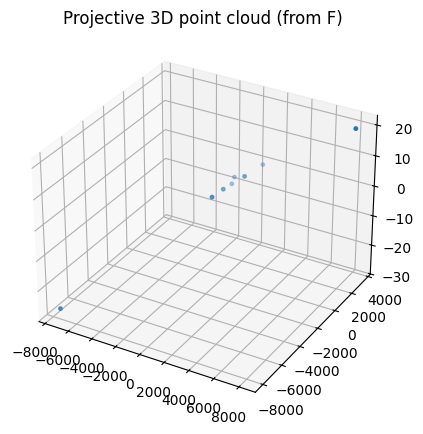

Reproj error LEFT:  mean 1.8205246111874027e-05 median 2.1507284842041073e-05
Reproj error RIGHT: mean 0.00011304978163117094 median 5.053343451620606e-05


In [32]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# ---------- 1) Load the best frame ----------
idx = best["idx"]
imgL = read_frame(left_path, idx)
imgR = read_frame(right_path, idx)
assert imgL is not None and imgR is not None, "Failed to load frames"

print("Using frame:", idx)
print("Frame shapes:", imgL.shape, imgR.shape)

plt.figure(figsize=(12,5))
plt.subplot(1,2,1); plt.imshow(imgL[:,:,::-1]); plt.axis("off"); plt.title("LEFT frame")
plt.subplot(1,2,2); plt.imshow(imgR[:,:,::-1]); plt.axis("off"); plt.title("RIGHT frame")
plt.show()

# Reuse matching results already computed for this frame (best dict stores kp/matches/pts)
kpL = best["kp1"]
kpR = best["kp2"]
good = best["matches"]
ptsL, ptsR = best["pts"]

print("Keypoints L/R:", len(kpL), len(kpR))
print("Good matches:", len(good))

# ---------- 2) Visualize matches ----------
match_vis = cv2.drawMatches(
    imgL, kpL, imgR, kpR, good[:80], None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)
plt.figure(figsize=(16,7))
plt.imshow(match_vis[:,:,::-1]); plt.axis("off"); plt.title("Top ORB matches")
plt.show()

# ---------- 3) Estimate Fundamental Matrix F (RANSAC) ----------
if ptsL is None or len(ptsL) < 8:
    raise RuntimeError("Too few matches to compute F (need >= 8).")

F, mask = cv2.findFundamentalMat(ptsL, ptsR, cv2.FM_RANSAC, 1.0, 0.999)
if F is None or mask is None:
    raise RuntimeError("findFundamentalMat failed. Try another frame or tweak ratio/max_features.")

mask = mask.ravel().astype(bool)
p1 = ptsL[mask]
p2 = ptsR[mask]

print("F inliers:", len(p1), "/", len(ptsL))
print("F:\n", F)

# ---------- 4) Draw epipolar lines ----------
def draw_epilines(img, pts, lines, n=12):
    out = img.copy()
    h, w = out.shape[:2]
    if len(pts) == 0:
        return out
    # choose evenly spaced points to visualize
    idxs = np.linspace(0, len(pts)-1, num=min(n, len(pts)), dtype=int)
    for i in idxs:
        a, b, c = lines[i]
        # line: ax + by + c = 0
        if abs(b) < 1e-6:
            continue
        x0, y0 = 0, int(-c / b)
        x1, y1 = w, int(-(c + a*w) / b)
        cv2.line(out, (x0, y0), (x1, y1), (0,255,0), 1)
        cv2.circle(out, tuple(pts[i].astype(int)), 4, (0,0,255), -1)
    return out

# lines in LEFT image corresponding to points in RIGHT (use whichImage=2)
linesL = cv2.computeCorrespondEpilines(p2.reshape(-1,1,2), 2, F).reshape(-1,3)
# lines in RIGHT image corresponding to points in LEFT (use whichImage=1)
linesR = cv2.computeCorrespondEpilines(p1.reshape(-1,1,2), 1, F).reshape(-1,3)

imgL_epi = draw_epilines(imgL, p1, linesL, n=12)
imgR_epi = draw_epilines(imgR, p2, linesR, n=12)

plt.figure(figsize=(14,5))
plt.subplot(1,2,1); plt.imshow(imgL_epi[:,:,::-1]); plt.axis("off"); plt.title("LEFT + epipolar lines")
plt.subplot(1,2,2); plt.imshow(imgR_epi[:,:,::-1]); plt.axis("off"); plt.title("RIGHT + epipolar lines")
plt.show()

# ---------- 5) (Optional) Correct matches + triangulate projective 3D ----------
# correctMatches expects (1,N,2)
p1_cm = p1.astype(np.float32).reshape(1, -1, 2)
p2_cm = p2.astype(np.float32).reshape(1, -1, 2)

p1c, p2c = cv2.correctMatches(F, p1_cm, p2_cm)  # returns (1,N,2)
p1c = p1c.reshape(-1,2)
p2c = p2c.reshape(-1,2)

print("Corrected points:", p1c.shape, p2c.shape)

def skew(v):
    x, y, z = v.ravel()
    return np.array([[0, -z,  y],
                     [z,  0, -x],
                     [-y, x,  0]], dtype=float)

# Epipole e' is nullspace of F^T: F^T e' = 0
U, S, Vt = np.linalg.svd(F.T)
e2 = Vt[-1]
e2 = e2 / e2[2]  # normalize

P1 = np.hstack([np.eye(3), np.zeros((3,1))])
P2 = np.hstack([skew(e2) @ F, e2.reshape(3,1)])

X_h = cv2.triangulatePoints(P1, P2, p1c.T, p2c.T)  # (4,N)
X = (X_h[:3] / X_h[3]).T  # (N,3)

print("Triangulated projective points:", X.shape)

fig = plt.figure(figsize=(6,5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], s=6)
ax.set_title("Projective 3D point cloud (from F)")
plt.show()

# ---------- 6) (Optional) Reprojection error sanity check ----------
def project(P, X):
    X_h = np.hstack([X, np.ones((X.shape[0], 1))])
    x = (P @ X_h.T).T
    x = x[:, :2] / x[:, 2:3]
    return x

x1_hat = project(P1, X)
x2_hat = project(P2, X)

err1 = np.linalg.norm(x1_hat - p1c, axis=1)
err2 = np.linalg.norm(x2_hat - p2c, axis=1)
print("Reproj error LEFT:  mean", float(err1.mean()), "median", float(np.median(err1)))
print("Reproj error RIGHT: mean", float(err2.mean()), "median", float(np.median(err2)))